In [1]:
#@title Click Headers
from IPython.display import HTML,display
def clickhtml(string,emo='✒️',font_color='#ff355e',
          font_family='times',font_size=22):
    html_str="""
    <p class='click_header' 
    onclick='setStyle(this,
        &#34;"""+font_color+"""&#34;,
        &#34;"""+font_family+"""&#34;,
        &#34;"""+str(font_size)+"""&#34;)'
    style='text-shadow:3px 3px 3px #ccc; font-family:courier; 
    font-size:20px; color:#ff33ff;'>
    """+emo+"""  """+string+"""
    </p>
    <script>
    function setStyle(element,color,family,size) {
     var docs=document.getElementsByClassName('click_header');
     for (var i=0; i<docs.length; i++) {
         docs[i].style='text-shadow:4px 4px 4px slategray; '+
                       'font-family:'+family+
                       '; font-size:'+size+'px; '; 
         docs[i].style.color=color;}; };
    </"""+"""script>"""
    display(HTML(html_str))

In [2]:
clickhtml('Code Modules & Parameters')

In [3]:
!python3 -m pip install git+https://github.com/tensorflow/docs --q

In [4]:
import numpy as np,pylab as pl,pandas as pd
import sys,h5py,urllib,zipfile,imageio,PIL
import tensorflow as tf
import tensorflow.keras.layers as tkl
from tensorflow_docs.vis import embed
from matplotlib import rcParams
rcParams['font.family']='serif'
#'light', 'normal','regular', 'book', 'medium', 'roman', 
#'semibold', 'demibold', 'demi', 'bold', 'heavy', 'extra bold', 'black'
rcParams['font.weight']='heavy'
#'ultra-condensed', 'extra-condensed', 'condensed', 'semi-condensed', 'normal',
#'semi-expanded', 'expanded', 'extra-expanded', 'ultra-expanded'
rcParams['font.stretch']='extra-expanded'

In [5]:
pd.DataFrame([list(rcParams.keys()),list(rcParams.values())])\
.T.iloc[100:130]

0                                                  1
100  figure.constrained_layout.hspace                                               0.02
101     figure.constrained_layout.use                                              False
102   figure.constrained_layout.w_pad                                            0.04167
103  figure.constrained_layout.wspace                                               0.02
104                        figure.dpi                                                 72
105                  figure.edgecolor                                       (1, 1, 1, 0)
106                  figure.facecolor                                       (1, 1, 1, 0)
107                    figure.figsize                                         [6.0, 4.0]
108                    figure.frameon                                               True
109           figure.max_open_warning                                                 20
110             figure.subplot.bottom                                              0.125
111             figure.subplot.hspace                                                0.2
112               figure.subplot.left                                              0.125
113              figure.subplot.right                                                0.9
114                figure.subplot.top                                               0.88
115             figure.subplot.wspace                                                0.2
116                  figure.titlesize                                              large
117                figure.titleweight                                             normal
118                      font.cursive  [Apple Chancery, Textile, Zapf Chancery, Sand,...
119                       font.family                                            [serif]
120                      font.fantasy  [Comic Neue, Comic Sans MS, Chicago, Charcoal,...
121                    font.monospace  [DejaVu Sans Mono, Bitstream Vera Sans Mono, C...
122                   font.sans-serif  [DejaVu Sans, Bitstream Vera Sans, Computer Mo...
123                        font.serif  [DejaVu Serif, Bitstream Vera Serif, Computer ...
124                         font.size                                                 10
125                      font.stretch                                     extra-expanded
126                        font.style                                             normal
127                      font.variant                                             normal
128                       font.weight                                              heavy
129                        grid.alpha                                                  1

In [6]:
seed_size=16; noise_dim=196; epochs=120
buffer_size=60000; batch_size=256
norm_img=tf.random.normal([1,noise_dim])
seed_imgs=tf.random.normal([seed_size,noise_dim])

In [7]:
clickhtml('Data')

In [162]:
(x,y),(_, _)=tf.keras.datasets.mnist.load_data()
x=x.reshape(x.shape[0],28,28,1).astype('float32')
print(x[0].shape,x.mean())

(28, 28, 1) 33.318447


In [163]:
x[0][:28,15:20,:1].reshape(28*5)

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,  18., 126., 136., 175.,  26., 253., 253., 253.,
       225., 172., 253., 253., 251.,  93.,  82., 182., 247., 241.,   0.,
         0.,   0.,  43., 154.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 160.,
       108.,   1.,   0.,   0., 253., 253., 119.,  25.,   0., 186., 253.,
       253., 150.,  27.,  16.,  93., 252., 253., 187.,   0.,   0., 249.,
       253., 249., 130., 183., 253., 253., 207., 253., 253., 253., 250.,
       182., 253., 253., 201.,  78.,   0., 198.,  81.,   2.,   0.,   0.,
         9.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.], dtype=float32)

In [ ]:
x=(x-127.5)/127.5
digits=tf.data.Dataset.from_tensor_slices(x)\
.shuffle(buffer_size).batch(batch_size)

In [147]:
x[0][:28,15:20,:1].reshape(28*5)

array([-1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.  

(28, 28, 1) -0.7386798


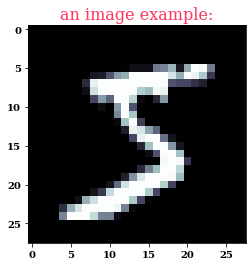

In [114]:
pl.imshow(x[0].reshape(28,28),cmap=pl.cm.bone)
pl.title('an image example:',color='#ff355e',fontsize=16)
print(x[0].shape,x.mean())

In [10]:
clickhtml('Deep Convolutional Generative Adversarial Network')

In [11]:
def tfgenerator():
    model=tf.keras.Sequential()
    model.add(tkl.Dense(7*7*256,use_bias=False,
                        input_shape=(noise_dim,)))
    model.add(tkl.BatchNormalization())
    model.add(tkl.LeakyReLU())
    model.add(tkl.Reshape((7,7,256)))
    model.add(tkl.Conv2DTranspose(
        256,(7,7),strides=(1,1),
        padding='same',use_bias=False))
    model.add(tkl.BatchNormalization())
    model.add(tkl.LeakyReLU())
    model.add(tkl.Conv2DTranspose(
        16,(7,7),strides=(2,2),
        padding='same',use_bias=False))
    model.add(tkl.BatchNormalization())
    model.add(tkl.LeakyReLU())
    model.add(tkl.Conv2DTranspose(
        1,(7,7),strides=(2,2),padding='same',
        use_bias=False,activation='tanh'))
    return model
tfgenerator=tfgenerator()

In [12]:
def tfdiscriminator():
    model=tf.keras.Sequential()
    model.add(tkl.Conv2D(
        16,(7,7),strides=(2,2),
        padding='same',input_shape=[28,28,1]))
    model.add(tkl.LeakyReLU())
    model.add(tkl.Dropout(.2))
    model.add(tkl.Conv2D(
        256,(7,7),strides=(2,2),padding='same'))
    model.add(tkl.LeakyReLU())
    model.add(tkl.Dropout(.2))
    model.add(tkl.Flatten())
    model.add(tkl.Dense(1))
    return model
tfdiscriminator=tfdiscriminator()

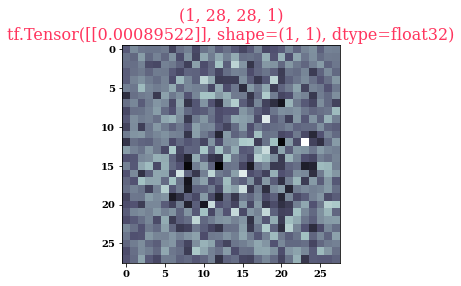

In [13]:
generated_img=tfgenerator(norm_img,training=False)
pl.imshow(generated_img[0,:,:,0],cmap=pl.cm.bone)
pl.title(str(generated_img.shape)+'\n'+\
         str(tfdiscriminator(generated_img)),
         color='#ff355e',fontsize=16);

In [14]:
cross_entropy=tf.keras.losses.BinaryCrossentropy(from_logits=True)
def discriminator_loss(real_output,fake_output):
    real_loss=cross_entropy(tf.ones_like(real_output),real_output)
    fake_loss=cross_entropy(tf.zeros_like(fake_output),fake_output)
    total_loss=real_loss+fake_loss
    return total_loss
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output),fake_output)
generator_optimizer=tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer=tf.keras.optimizers.Adam(1e-4)
checkpoint=tf.train.Checkpoint(
    generator_optimizer=generator_optimizer,
    discriminator_optimizer=discriminator_optimizer,
    generator=tfgenerator,discriminator=tfdiscriminator)

In [15]:
clickhtml('Training')

In [16]:
@tf.function
def train_step(imgs):
    random_imgs=tf.random.normal([batch_size,noise_dim])
    with tf.GradientTape() as gen_tape,tf.GradientTape() as disc_tape:
        generated_imgs=tfgenerator(random_imgs,training=True)
        real_output=tfdiscriminator(imgs,training=True)
        fake_output=tfdiscriminator(generated_imgs,training=True)
        gen_loss=generator_loss(fake_output)
        disc_loss=discriminator_loss(real_output,fake_output)
        gradients_of_generator=\
        gen_tape.gradient(gen_loss,tfgenerator.trainable_variables)
        gradients_of_discriminator=\
        disc_tape.gradient(disc_loss,tfdiscriminator.trainable_variables)
        generator_optimizer\
        .apply_gradients(zip(gradients_of_generator,
                             tfgenerator.trainable_variables))
        discriminator_optimizer\
        .apply_gradients(zip(gradients_of_discriminator,
                             tfdiscriminator.trainable_variables))

In [17]:
def generate_images(model,epoch,test_input):
    predictions=model(test_input,training=False)
    fig=pl.figure(figsize=(6,6))
    for i in range(predictions.shape[0]):
        pl.subplot(4,4,i+1)
        pl.imshow(predictions[i,:,:,0]*127.5+127.5,cmap=pl.cm.bone)
        pl.axis('off')
    pl.savefig('epoch_{:04d}.png'.format(epoch+1))
    pl.suptitle('epoch: %04d'%(epoch+1),color='#ff355e',fontsize=16)
    pl.show()

In [18]:
def train(data,epochs):
    for epoch in range(epochs):
        for image_batch in data:
            train_step(image_batch)
#            display.clear_output(wait=True)
        if (epoch+1)%20==0:
            generate_images(tfgenerator,epoch,seed_imgs)
#        if (epoch+1)%20==0:
#            checkpoint.save(file_prefix='')
#            display.clear_output(wait=True)
#            generate_images(tfgenerator,epochs,seed_imgs)

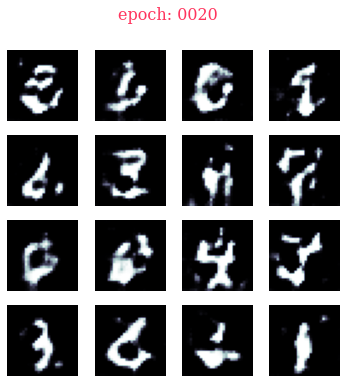

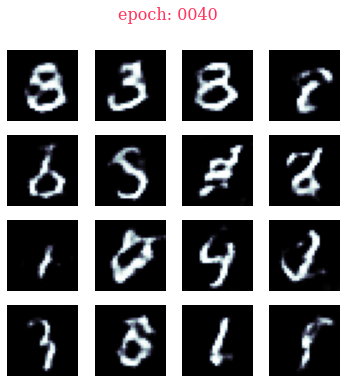

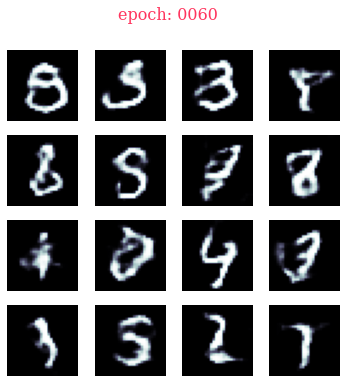

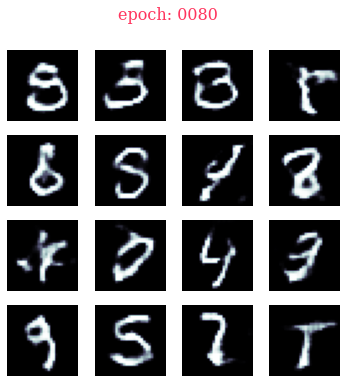

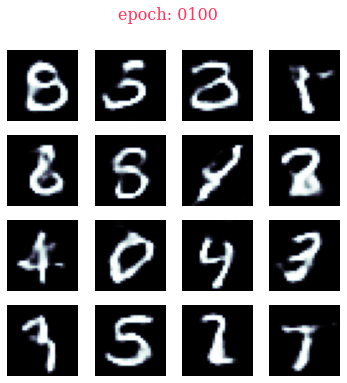

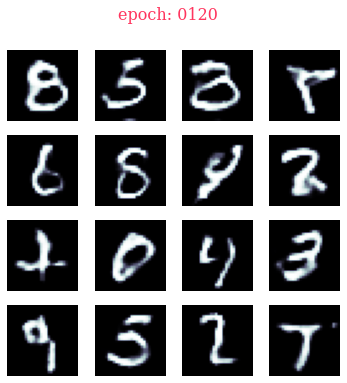

In [19]:
train(digits,epochs)

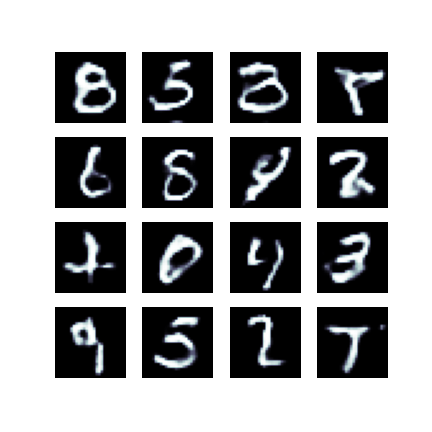

In [20]:
PIL.Image.open('epoch_{:04d}.png'.format(120))

In [21]:
clickhtml('Interpolation')

In [22]:
def animate(images):
    converted_images=np.clip(images*255,0,255).astype(np.uint8)
    imageio.mimsave('animation.gif',converted_images)
    return embed.embed_file('animation.gif')

In [23]:
def interpolate_hypersphere(v1,v2,steps):
    v1norm=tf.norm(v1); v2norm=tf.norm(v2)
    v2normalized=v2*(v1norm/v2norm)
    vectors=[]
    for step in range(steps):
        interpolated=v1+(v2normalized-v1)*step/(steps-1)
        interpolated_norm=tf.norm(interpolated)
        interpolated_normalized=\
        interpolated*(v1norm/interpolated_norm)
        vectors.append(interpolated_normalized)
    return tf.stack(vectors)

In [44]:
def interpolate_between_vectors(steps):
    tf.random.set_seed(12)
    v1=tf.random.normal([noise_dim])
    tf.random.set_seed(45)
    v2=tf.random.normal([noise_dim])
    vectors=interpolate_hypersphere(v1,v2,steps)
    interpolated_imgs=tfgenerator(vectors,training=False)
    interpolated_imgs=tf.image.resize(interpolated_imgs,[128,128])
    return interpolated_imgs


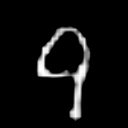

In [45]:
imgs=interpolate_between_vectors(120)
animate(imgs)

In [387]:
clickhtml('Parameters 2 & Data 2')

In [388]:
seed_size=16; noise_dim=256; img_size=42
epochs=150; buffer_size=11000; batch_size=128
norm_img=tf.random.normal([1,noise_dim])
seed_imgs=tf.random.normal([seed_size,noise_dim])

In [389]:
fpath='https://olgabelitskaya.github.io/'
zf='LetterColorImages_123.h5.zip'
input_file=urllib.request.urlopen(fpath+zf)
output_file=open(zf,'wb'); 
output_file.write(input_file.read())
output_file.close(); input_file.close()
zipf=zipfile.ZipFile(zf,'r')
zipf.extractall(''); zipf.close()
f=h5py.File(zf[:-4],'r')
keys=list(f.keys()); print(keys)
x=np.array(f[keys[1]],dtype='float32')
print(x[0].shape,x.mean())
y=np.array(f[keys[2]],dtype='int32').reshape(-1,1)-1
N=len(y); n=int(.1*N)
shuffle_ids=np.arange(N)
np.random.RandomState(23).shuffle(shuffle_ids)
x,y=x[shuffle_ids],y[shuffle_ids]
x=tf.image.resize(x,[img_size,img_size]).numpy()
x=tf.image.rgb_to_grayscale(x).numpy()
x=np.array(x.reshape(-1,img_size,img_size,1),dtype='float32')

['backgrounds', 'images', 'labels']
(32, 32, 3) 150.46324


In [390]:
x[1][:42,:10,:1].reshape(42*10)

array([175.08119 , 181.50914 , 188.31798 , 191.93184 , 186.68591 ,
       177.14009 , 176.75166 , 183.22433 , 190.44118 , 188.36852 ,
       175.72398 , 183.43872 , 191.11517 , 194.84654 , 189.11084 ,
       179.77966 , 179.59497 , 186.2709  , 193.8364  , 191.21245 ,
       173.24805 , 181.04985 , 188.76338 , 192.49779 , 186.85205 ,
       178.01724 , 177.71252 , 183.88535 , 191.11995 , 188.56137 ,
       168.43419 , 174.91628 , 181.56458 , 184.9581  , 179.98625 ,
       172.06448 , 171.49614 , 176.65077 , 183.03946 , 181.18481 ,
       165.47374 , 170.14323 , 174.91316 , 177.16667 , 172.84145 ,
       166.55838 , 166.3528  , 170.99438 , 177.04233 , 175.90742 ,
       172.71198 , 177.9665  , 183.21057 , 185.6835  , 181.35892 ,
       173.59686 , 173.13727 , 178.68144 , 186.17824 , 184.4952  ,
       178.10442 , 184.1952  , 190.33963 , 193.40324 , 188.84946 ,
       179.62193 , 179.24223 , 185.81342 , 193.8317  , 190.86661 ,
       178.79073 , 185.7027  , 192.34361 , 195.36029 , 190.321

(42, 42, 1) 149.50645


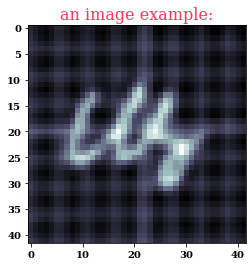

In [391]:
pl.imshow(255-x[1].reshape(img_size,img_size),cmap=pl.cm.bone)
pl.title('an image example:',color='#ff355e',fontsize=16)
print(x[1].shape,x.mean())

In [392]:
x=(x-127.5)/127.5
letters=tf.data.Dataset.from_tensor_slices(x)\
.shuffle(buffer_size).batch(batch_size)

In [393]:
x[0][:42,:20,:1].reshape(42*20)

array([-0.08973017, -0.08468861, -0.08188782, -0.08112051, -0.07761278,
       -0.07186896, -0.07507198, -0.08188782, -0.08188782, -0.08188782,
       -0.07796667, -0.07404546, -0.07430928, -0.08275177, -0.07905824,
       -0.06776566, -0.05352556, -0.05105812, -0.05711413, -0.06044264,
       -0.08973017, -0.08144771, -0.07768895, -0.07830721, -0.07546823,
       -0.07470565, -0.07623393, -0.07911072, -0.08180369, -0.08188782,
       -0.07544591, -0.07296514, -0.08410262, -0.08327667, -0.07535556,
       -0.06520069, -0.05699397, -0.059954  , -0.06295705, -0.06594633,
       -0.08786669, -0.0810222 , -0.07799999, -0.07882613, -0.07735746,
       -0.07855075, -0.08034261, -0.07976989, -0.07258935, -0.0756754 ,
       -0.07152662, -0.06987096, -0.08009613, -0.07653958, -0.07042661,
       -0.0641814 , -0.05991133, -0.0624693 , -0.06302885, -0.06469607,
       -0.08327942, -0.08238477, -0.08135878, -0.08079858, -0.08179447,
       -0.0827903 , -0.08514548, -0.08154123, -0.06033074, -0.06

(42, 42, 1) 0.17260021


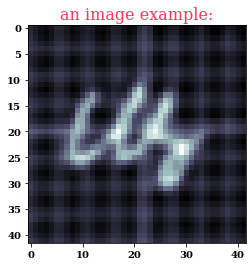

In [394]:
pl.imshow(1-x[1].reshape(img_size,img_size),cmap=pl.cm.bone)
pl.title('an image example:',color='#ff355e',fontsize=16)
print(x[1].shape,x.mean())

In [395]:
clickhtml('DCGAN 2')

In [396]:
def tfgenerator2():
    model=tf.keras.Sequential()
    model.add(tkl.Dense(
        7*7*256,use_bias=False,input_shape=(noise_dim,)))
    model.add(tkl.BatchNormalization())
    model.add(tkl.LeakyReLU())
    model.add(tkl.Reshape((7,7,256)))
    model.add(tkl.Conv2DTranspose(
        256,(7,7),strides=(3,3),
        padding='same',use_bias=False))
    model.add(tkl.BatchNormalization())
    model.add(tkl.LeakyReLU())
    model.add(tkl.Conv2DTranspose(
        32,(7,7),strides=(2,2),
        padding='same',use_bias=False))
    model.add(tkl.BatchNormalization())
    model.add(tkl.LeakyReLU())
    model.add(tkl.Conv2DTranspose(
        1,(7,7),strides=(1,1),padding='same',
        use_bias=False,activation='tanh'))
    return model
tfgenerator2=tfgenerator2()

In [397]:
def tfdiscriminator2():
    model=tf.keras.Sequential()
    model.add(tkl.Conv2D(
        32,(7,7),strides=(2,2),padding='same',
        input_shape=[img_size,img_size,1]))
    model.add(tkl.LeakyReLU())
    model.add(tkl.Dropout(.2))
    model.add(tkl.Conv2D(
        256,(7,7),strides=(2,2),padding='same'))
    model.add(tkl.LeakyReLU())
    model.add(tkl.Dropout(.2))
    model.add(tkl.Flatten())
    model.add(tkl.Dense(1))
    return model
tfdiscriminator2=tfdiscriminator2()

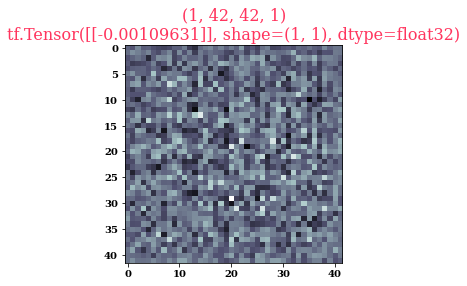

In [398]:
generated_img=tfgenerator2(norm_img,training=False)
pl.imshow(generated_img[0,:,:,0],cmap=pl.cm.bone)
pl.title(str(generated_img.shape)+'\n'+\
         str(tfdiscriminator2(generated_img)),
         color='#ff355e',fontsize=16);

In [399]:
cross_entropy=tf.keras.losses.BinaryCrossentropy(from_logits=True)
def discriminator_loss(real_output,fake_output):
    real_loss=cross_entropy(tf.ones_like(real_output),real_output)
    fake_loss=cross_entropy(tf.zeros_like(fake_output),fake_output)
    total_loss=real_loss+fake_loss
    return total_loss
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output),fake_output)
generator_optimizer2=tf.keras.optimizers.Adam(1e-3)
discriminator_optimizer2=tf.keras.optimizers.Adam(1e-3)

In [400]:
clickhtml('Training')

In [401]:
@tf.function
def train_step2(imgs):
    random_imgs=tf.random.normal([batch_size,noise_dim])
    with tf.GradientTape() as gen_tape,tf.GradientTape() as disc_tape:
        generated_imgs=tfgenerator2(random_imgs,training=True)
        real_output=tfdiscriminator2(imgs,training=True)
        fake_output=tfdiscriminator2(generated_imgs,training=True)
        gen_loss=generator_loss(fake_output)
        disc_loss=discriminator_loss(real_output,fake_output)
        gradients_of_generator=\
        gen_tape.gradient(gen_loss,tfgenerator2.trainable_variables)
        gradients_of_discriminator=\
        disc_tape.gradient(disc_loss,tfdiscriminator2.trainable_variables)
        generator_optimizer2\
        .apply_gradients(zip(gradients_of_generator,
                             tfgenerator2.trainable_variables))
        discriminator_optimizer2\
        .apply_gradients(zip(gradients_of_discriminator,
                             tfdiscriminator2.trainable_variables))

In [402]:
def generate_images2(model,epoch,test_input):
    predictions=model(test_input,training=False)
    fig=pl.figure(figsize=(6,6))
    for i in range(predictions.shape[0]):
        pl.subplot(4,4,i+1)
        pl.imshow(127.5-predictions[i,:,:,0]*127.5,cmap=pl.cm.bone)
        pl.axis('off')
    pl.savefig('epoch_{:04d}.png'.format(epoch+1))
    pl.suptitle('epoch: %04d'%(epoch+1),color='#ff355e',fontsize=16)
    pl.show()

In [403]:
def train2(data,epochs):
    for epoch in range(epochs):
        for image_batch in data:
            train_step2(image_batch)
        if (epoch+1)%10==0:
            generate_images2(tfgenerator2,epoch,seed_imgs)

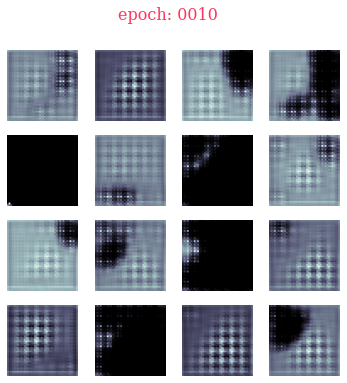

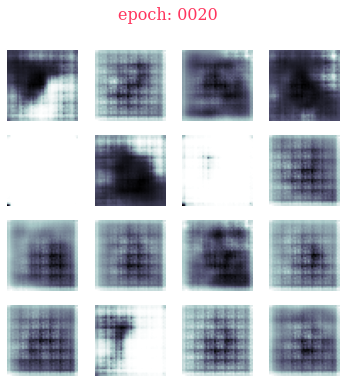

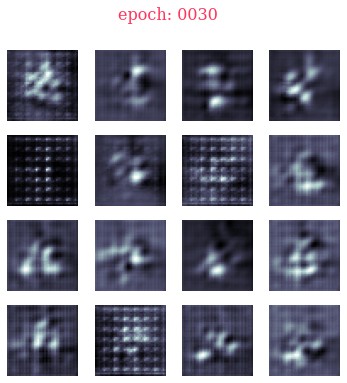

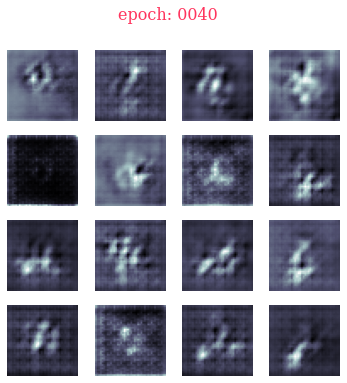

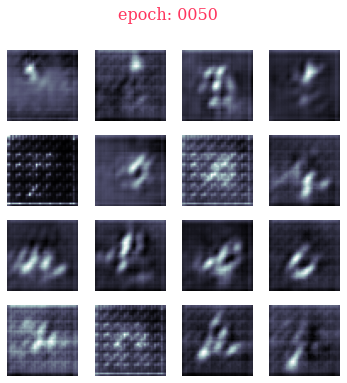

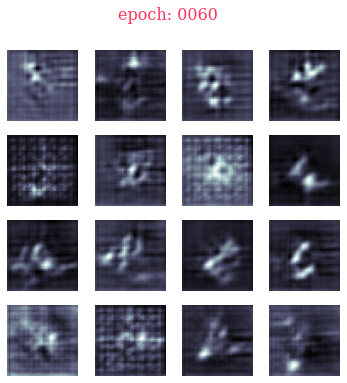

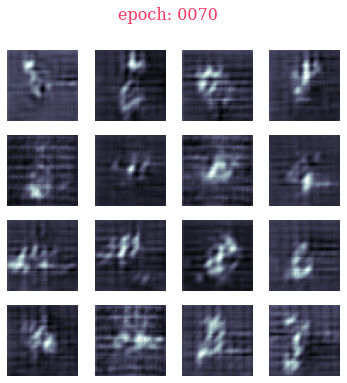

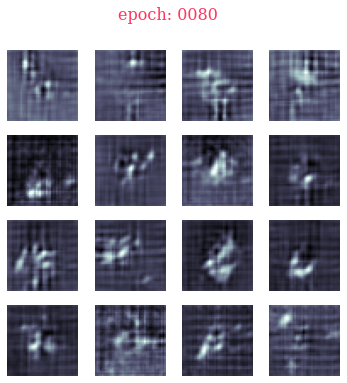

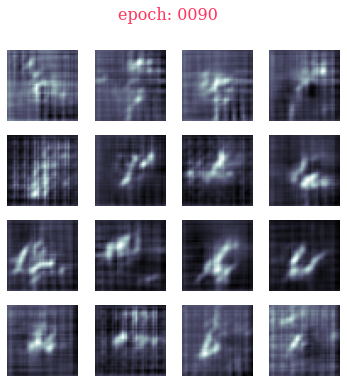

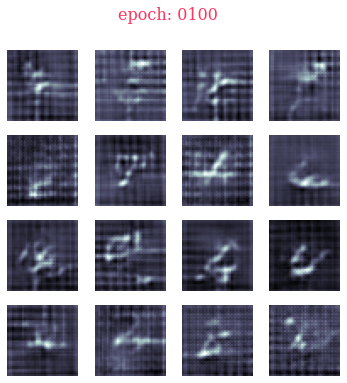

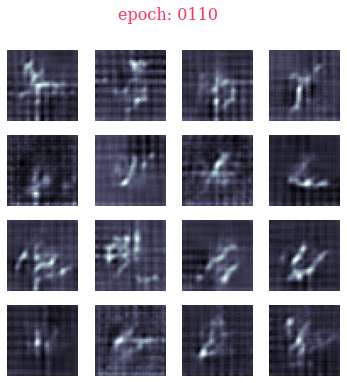

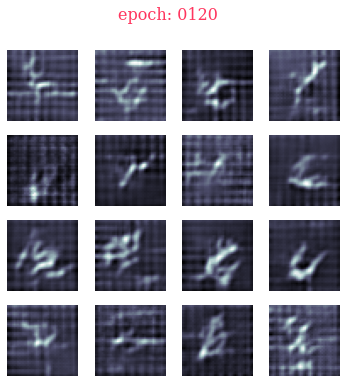

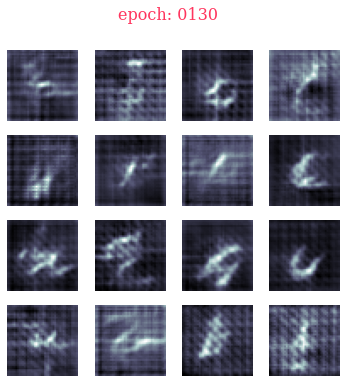

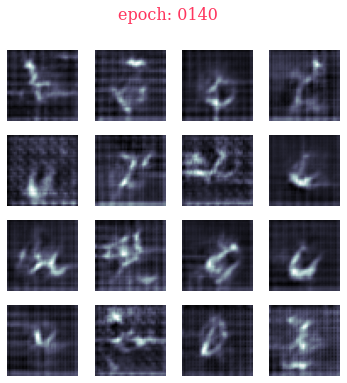

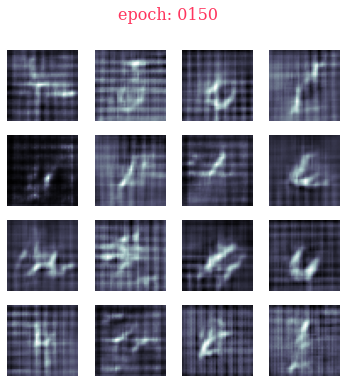

In [404]:
train2(letters,epochs)

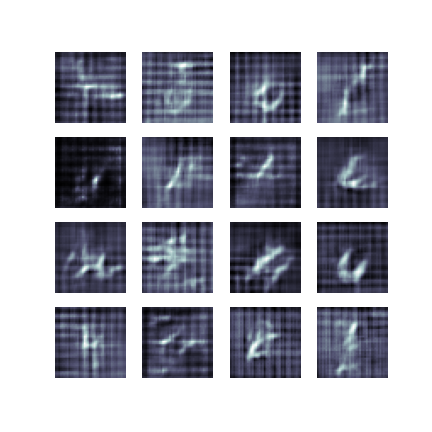

In [405]:
PIL.Image.open('epoch_{:04d}.png'.format(150))

In [406]:
def interpolate_between_vectors2(steps):
    tf.random.set_seed(1)
    v1=tf.random.normal([noise_dim])
    tf.random.set_seed(123)
    v2=tf.random.normal([noise_dim])
    vectors=interpolate_hypersphere(v1,v2,steps)
    interpolated_imgs=tfgenerator2(vectors,training=False)
#    interpolated_imgs=127.5-interpolated_imgs*127.5
    interpolated_imgs=\
    tf.image.resize(interpolated_imgs,[128,128])
    return interpolated_imgs


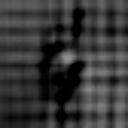

In [407]:
imgs=interpolate_between_vectors2(180)
animate(imgs)